In [1]:
import os 
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import seaborn as sns
import matplotlib.pyplot as plt

## Problem Statemnt
#### Pada kasus ini terdapat data pelanggan dengan informasi sebagai berikut : 
- Nama Pelanggan : berisi informasi nama-nama pelanggan.
- Jenis kelamin : berisi informasi jenis kelamin dari pelanggan (Pria, Wanita).
- Umur : berisi informasi usia pelanggan.
- Profesi : berisi informasi jenis profesi/pekerjaan tiap pelanggan.
- Tipe Residen : berisi informasi mengenai jenis tempat tinggal.
- NilaiBelanjaSetahun : berisi informasi total pengeluaran dalam waktu satu tahun dalam mata uang dollar.

Lalu, perusahaan ingin melihat behaviour dari pelanggan dengan membaginya berdasarkan kelompok-kelompok tertentu

In [2]:
customer_data = pd.read_csv('C:/Users/giryi/Junior DataScientist/customer_segments.csv')
customer_data.head()

,Nama Pelanggan,Jenis Kelamin,Umur,Profesi,Tipe Residen,NilaiBelanjaSetahun
0,Budi Anggara,Pria,58,Wiraswasta,Sector,9497927
1,Shirley Ratuwati,Wanita,14,Pelajar,Cluster,2722700
2,Agus Cahyono,Pria,48,Professional,Cluster,5286429
3,Antonius Winarta,Pria,53,Professional,Cluster,5204498
4,"Ibu Sri Wahyuni, IR",Wanita,41,Wiraswasta,Cluster,10615206


In [3]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Nama Pelanggan       50 non-null     object
 1   Jenis Kelamin        50 non-null     object
 2   Umur                 50 non-null     int64 
 3   Profesi              50 non-null     object
 4   Tipe Residen         50 non-null     object
 5   NilaiBelanjaSetahun  50 non-null     int64 
dtypes: int64(2), object(4)
memory usage: 2.5+ KB


## Data Preprocessing

In [44]:
# Cek data missing value
missing = pd.isnull(customer_data).sum()
missing

Nama Pelanggan         0
Jenis Kelamin          0
Umur                   0
Profesi                0
Tipe Residen           0
NilaiBelanjaSetahun    0
dtype: int64

In [45]:
# cek data duplicated
duplicated = customer_data[customer_data.duplicated()]
duplicated

,Nama Pelanggan,Jenis Kelamin,Umur,Profesi,Tipe Residen,NilaiBelanjaSetahun


In [46]:
# cek data yang category ada apa aja 
categorical = ['Jenis Kelamin','Profesi','Tipe Residen']
df_categorical = customer_data[categorical]
df_categorical.head()

,Jenis Kelamin,Profesi,Tipe Residen
0,Pria,Wiraswasta,Sector
1,Wanita,Pelajar,Cluster
2,Pria,Professional,Cluster
3,Pria,Professional,Cluster
4,Wanita,Wiraswasta,Cluster


## Exploratory Data Analysis (EDA)

C:\Users\giryi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Umur'>

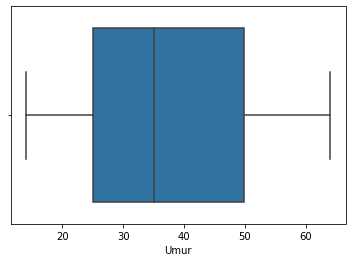

In [47]:
# melihat persebaran data usia pelanggan di perusahaan ini
sns.boxplot(customer_data['Umur'])

Dari hasil ini didapat bahwa persebaran usia pelanggan itu di anatara umur < 20 dan > 60 dan rata-rata itu umurnya 35 tahun

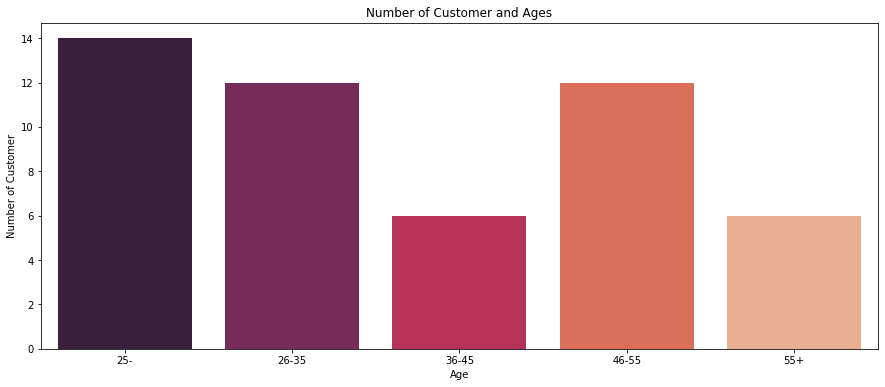

In [8]:
#menggolongkan usia dan melihat persebaranya dalam data
umur25bawah = customer_data.Umur[(customer_data.Umur <= 25) & (customer_data.Umur >= 12)]
umur26_35 = customer_data.Umur[(customer_data.Umur <= 35) & (customer_data.Umur >= 26)]
umur36_45 = customer_data.Umur[(customer_data.Umur <= 45) & (customer_data.Umur >= 36)]
umur46_55 = customer_data.Umur[(customer_data.Umur <= 55) & (customer_data.Umur >= 46)]
umur55keatas = customer_data.Umur[customer_data.Umur >= 56]

x = ['25-','26-35','36-45','46-55','55+']
y = [len(umur25bawah.values),len(umur26_35.values),len(umur36_45.values),len(umur46_55.values),len(umur55keatas.values)]


plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

Dari gambar diatas diketahui bahwa kisaran usia kurang dari sama dengan 25 tahun memiliki proporsi pelanggan terbanyak , disusul umur 26-35 dan 46-55 tahun

C:\Users\giryi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='NilaiBelanjaSetahun'>

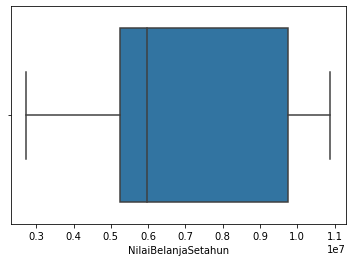

In [9]:
sns.boxplot(customer_data['NilaiBelanjaSetahun'])

Dari hasil ini didapat bahwa rata-rata total belanja setahun berkisar pada nilai 0.6 x 10'7 dollar

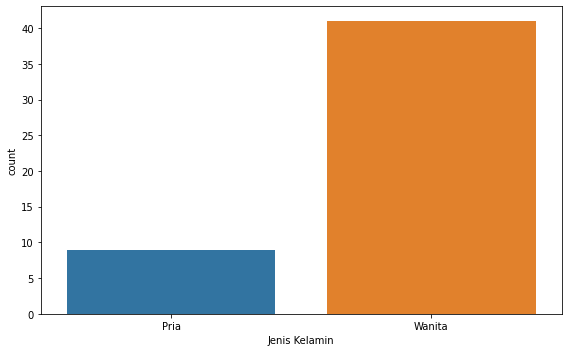

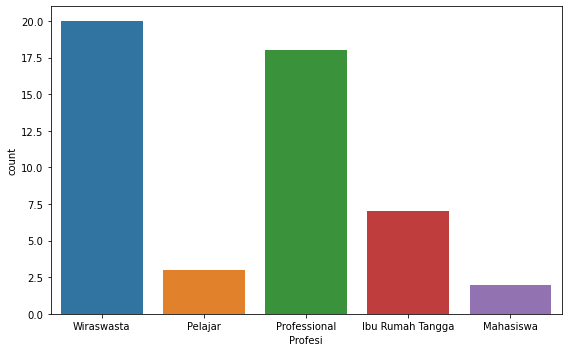

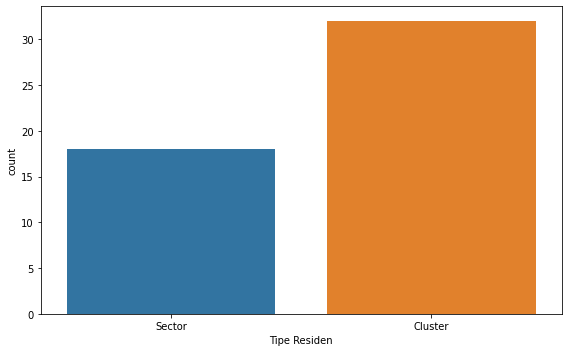

In [10]:
for col in categorical:
    plt.figure(figsize=(8,5))
    sns.countplot(x=col, data=customer_data)
    plt.tight_layout()

Dari hasil ini diperoleh bahwa wanita saat ini menjadi pelanggan terbanyak,wiraswata profesi yang mendominasi dan tipe residen yang tercord paling banyak memiliki tipke residen cluster

In [48]:
# merubah data string ke dalam numerik
label_encoder = LabelEncoder()
encoded_data = customer_data[categorical].apply(label_encoder.fit_transform)

data = pd.concat([encoded_data, customer_data[['Umur','NilaiBelanjaSetahun']]], axis=1)

data.head()

,Jenis Kelamin,Profesi,Tipe Residen,Umur,NilaiBelanjaSetahun
0,0,4,1,58,9497927
1,1,2,0,14,2722700
2,0,3,0,48,5286429
3,0,3,0,53,5204498
4,1,4,0,41,10615206


## features selection

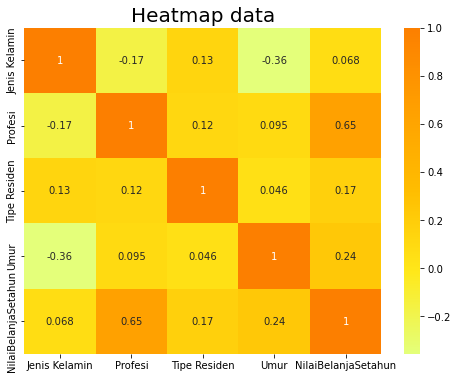

In [12]:
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(),cmap = 'Wistia', annot = True)
plt.title('Heatmap data',fontsize= 20)
plt.show()

Dari hasil ini diketahui bahwa korelasi atau hubungan antar variabel yang tinggi di miliki oleh variabel nilai belanja setahun dan profesi. Oleh karena itu untuk tahap selanjutnya digunakan 2 variabel ini dalam menentukan cluster dari data profesi dan nilai belanja setahun

In [13]:
data = data.drop(['Jenis Kelamin', 'Tipe Residen', 'Umur'], axis = 1)
data.head()

,Profesi,NilaiBelanjaSetahun
0,4,9497927
1,2,2722700
2,3,5286429
3,3,5204498
4,4,10615206


## Scalling data

In [14]:
scaler = StandardScaler()
data[['Profesi','NilaiBelanjaSetahun']] = scaler.fit_transform(data[['Profesi','NilaiBelanjaSetahun']])
data.head()

,Profesi,NilaiBelanjaSetahun
0,0.851837,0.946763
1,-0.616847,-1.695081
2,0.117495,-0.695414
3,0.117495,-0.727361
4,0.851837,1.382421


## KMeans Cluster

In [17]:
cluster = KMeans(n_clusters=2)
cluster.fit(data)

KMeans(n_clusters=2)

In [18]:
segment = pd.Series(cluster.labels_, name='segment')

In [20]:
pd.concat([customer_data,segment], axis=1)

,Nama Pelanggan,Jenis Kelamin,Umur,Profesi,Tipe Residen,NilaiBelanjaSetahun,segment
0,Budi Anggara,Pria,58,Wiraswasta,Sector,9497927,0
1,Shirley Ratuwati,Wanita,14,Pelajar,Cluster,2722700,1
2,Agus Cahyono,Pria,48,Professional,Cluster,5286429,1
3,Antonius Winarta,Pria,53,Professional,Cluster,5204498,1
4,"Ibu Sri Wahyuni, IR",Wanita,41,Wiraswasta,Cluster,10615206,0
5,Rosalina Kurnia,Wanita,24,Professional,Cluster,5215541,1
6,"Cahyono, Agus",Pria,64,Wiraswasta,Sector,9837260,0
7,Danang Santosa,Pria,52,Professional,Cluster,5223569,1
8,Elisabeth Suryadinata,Wanita,29,Professional,Sector,5993218,1
9,Mario Setiawan,Pria,33,Professional,Cluster,5257448,1


In [22]:
sum_error = []
K = range(2,10)
for k in K :
    km = KMeans(n_clusters=k)
    km = km.fit(data)
    sum_error.append(km.inertia_)

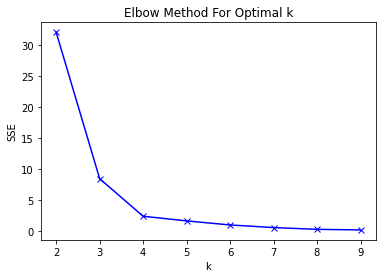

In [24]:
plt.plot(K, sum_error, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('Elbow Method For Optimal k')
plt.show()

In [26]:
range_n_clusters = range(2,10)
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters)
    preds = clusterer.fit_predict(data)
    centers = clusterer.cluster_centers_

    score = silhouette_score(data, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.681979195097331
For n_clusters = 3, silhouette score is 0.785057992924231
For n_clusters = 4, silhouette score is 0.8491952909238699
For n_clusters = 5, silhouette score is 0.7719536764512731
For n_clusters = 6, silhouette score is 0.7912853388219153
For n_clusters = 7, silhouette score is 0.7773599784790521
For n_clusters = 8, silhouette score is 0.7964226316706623
For n_clusters = 9, silhouette score is 0.7743380058769962


Berdasarkan dari silhoutte model didapat k-kluster yang optimum adalah 4, maka nilai k yang digunakan bernilai 4

In [28]:
cluster = KMeans(n_clusters=4)
cluster.fit(data)

KMeans(n_clusters=4)

In [29]:
segment = pd.Series(cluster.labels_, name="segment")

In [33]:
results = pd.concat([customer_data, segment], axis=1)
results

,Nama Pelanggan,Jenis Kelamin,Umur,Profesi,Tipe Residen,NilaiBelanjaSetahun,segment
0,Budi Anggara,Pria,58,Wiraswasta,Sector,9497927,1
1,Shirley Ratuwati,Wanita,14,Pelajar,Cluster,2722700,0
2,Agus Cahyono,Pria,48,Professional,Cluster,5286429,2
3,Antonius Winarta,Pria,53,Professional,Cluster,5204498,2
4,"Ibu Sri Wahyuni, IR",Wanita,41,Wiraswasta,Cluster,10615206,1
5,Rosalina Kurnia,Wanita,24,Professional,Cluster,5215541,2
6,"Cahyono, Agus",Pria,64,Wiraswasta,Sector,9837260,1
7,Danang Santosa,Pria,52,Professional,Cluster,5223569,2
8,Elisabeth Suryadinata,Wanita,29,Professional,Sector,5993218,2
9,Mario Setiawan,Pria,33,Professional,Cluster,5257448,2


In [34]:
results[results["segment"]==0][:5]

,Nama Pelanggan,Jenis Kelamin,Umur,Profesi,Tipe Residen,NilaiBelanjaSetahun,segment
1,Shirley Ratuwati,Wanita,14,Pelajar,Cluster,2722700,0
19,Irene Novianto,Wanita,16,Pelajar,Sector,2896845,0
30,Eviana Handry,Wanita,19,Mahasiswa,Cluster,3042773,0
32,Cecilia Kusnadi,Wanita,19,Mahasiswa,Cluster,3047926,0
39,Irene Darmawan,Wanita,14,Pelajar,Sector,2861855,0


In [35]:
results[results["segment"]==1][:5]

,Nama Pelanggan,Jenis Kelamin,Umur,Profesi,Tipe Residen,NilaiBelanjaSetahun,segment
0,Budi Anggara,Pria,58,Wiraswasta,Sector,9497927,1
4,"Ibu Sri Wahyuni, IR",Wanita,41,Wiraswasta,Cluster,10615206,1
6,"Cahyono, Agus",Pria,64,Wiraswasta,Sector,9837260,1
12,Cahaya Putri,Wanita,64,Wiraswasta,Cluster,9333168,1
13,Mario Setiawan,Pria,60,Wiraswasta,Cluster,9471615,1


In [36]:
results[results["segment"]==2][:5]

,Nama Pelanggan,Jenis Kelamin,Umur,Profesi,Tipe Residen,NilaiBelanjaSetahun,segment
2,Agus Cahyono,Pria,48,Professional,Cluster,5286429,2
3,Antonius Winarta,Pria,53,Professional,Cluster,5204498,2
5,Rosalina Kurnia,Wanita,24,Professional,Cluster,5215541,2
7,Danang Santosa,Pria,52,Professional,Cluster,5223569,2
8,Elisabeth Suryadinata,Wanita,29,Professional,Sector,5993218,2


In [37]:
results[results["segment"]==3][:5]

,Nama Pelanggan,Jenis Kelamin,Umur,Profesi,Tipe Residen,NilaiBelanjaSetahun,segment
16,Yuni Sari,Wanita,32,Ibu Rumah Tangga,Cluster,5677762,3
17,Nelly Halim,Wanita,63,Ibu Rumah Tangga,Cluster,5340690,3
27,Adeline Huang,Wanita,40,Ibu Rumah Tangga,Cluster,6631680,3
29,Rosita Saragih,Wanita,46,Ibu Rumah Tangga,Sector,5020976,3
40,Shinta Aritonang,Wanita,24,Ibu Rumah Tangga,Cluster,6820976,3


## EDA 2

Selanjutnya setelah tahap segmentasi pelanggan dilakukan, maka dilakukan tahap analisa pada masing masing cluster

<AxesSubplot:xlabel='segment', ylabel='Umur'>

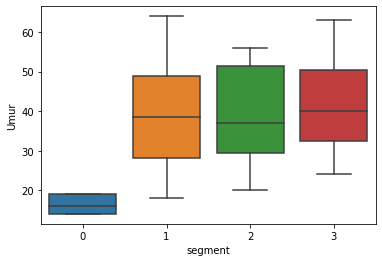

In [39]:
sns.boxplot(x=results['segment'], y=results['Umur'], data=results)

Diketahui perbedaan mencolok terdapat pada cluster 0, dimana range usia dalam cluster tersebut adalah < 20 dengan kata lain terdiri dari anak anak muda. Sedangkan range usia paling bervariasi terletak pada cluster 1, sedangkan sisanya sama terdiri dari usia dewasa hingga menua

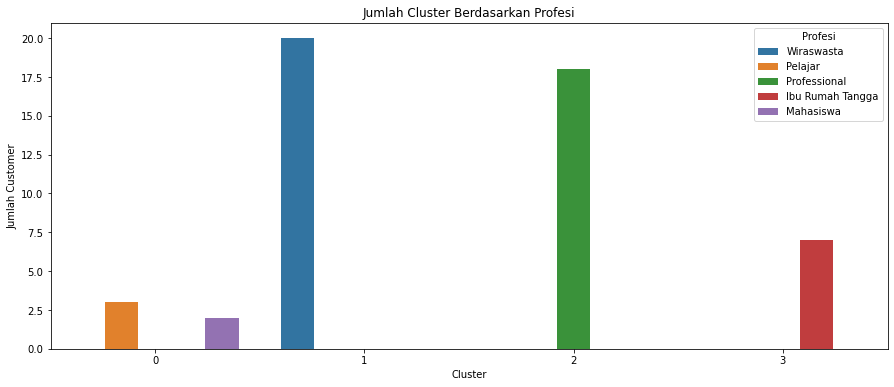

In [40]:
plt.figure(figsize=(15,6))
sns.countplot(x="segment", data=results, hue="Profesi")
plt.title("Jumlah Cluster Berdasarkan Profesi")
plt.xlabel("Cluster")
plt.ylabel("Jumlah Customer")
plt.show()

<AxesSubplot:xlabel='segment', ylabel='NilaiBelanjaSetahun'>

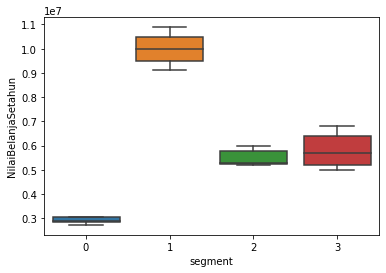

In [41]:
sns.boxplot(x=results["segment"], y=results["NilaiBelanjaSetahun"], data=results)

Berdasarkan Total Belanja Setahun
- Cluster 1 memiliki kecendurungan pengeluaran lebih tinggi dibanding dengan lainnya. Perbedaannya-pun cukup signifikan.
- Cluster 2 memiliki pengeluaran dikisaran $0.5 x 10^7 - 0.6 x 10^7$ dollar.
- Cluster 3 memiliki pengeluaran dikisaran $0.5 x 10^7 - 0.7 x 10^7$ dollar. Sedikit lebih tinggi dibandingkan dengan cluster 2.
- Cluster 0 memiliki pengeluaran $< 0.4 x 10^7$ dollar, paling rendah dibanding cluster lainnya.

**Visualisasi keterkaitan anatar Nilai Belanja Setahun dengan Usia**

<AxesSubplot:xlabel='Umur', ylabel='NilaiBelanjaSetahun'>

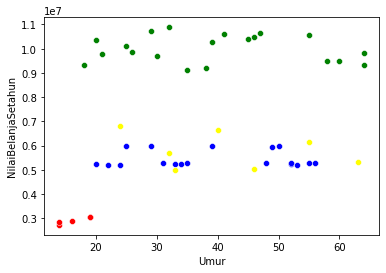

In [43]:
sns.scatterplot(x=results[results["segment"]==0].Umur, y=results[results["segment"]==0].NilaiBelanjaSetahun, color="red")
sns.scatterplot(x=results[results["segment"]==1].Umur, y=results[results["segment"]==1].NilaiBelanjaSetahun, color="green")
sns.scatterplot(x=results[results["segment"]==2].Umur, y=results[results["segment"]==2].NilaiBelanjaSetahun, color="blue")
sns.scatterplot(x=results[results["segment"]==3].Umur, y=results[results["segment"]==3].NilaiBelanjaSetahun, color="yellow")

Dari analisa yang dilakukan maka didapati informasi bahwa : 
- Kelompok pertama yaitu cluster 1 merupakan kelompok dengan pengeluaran tahunan yang paling tinggi dibanding yang lainnya, oleh karena itu dapat dikatakan bahwa wiraswasta lebih konsumtif dibandingkan dengan profesi-profesi lainnya.
- Kelompok kedua yaitu cluster 2 adalah kelompok dengan profesi sebagai profesional dan memiliki pengeluaran cukup rendah dibanding orang-orang seusianya.
- Kelompok ketiga yaitu cluster 3 adalah kelompok yang memiliki penghasilan terbesar kedua, dengan melihat kembali profesi dalam kelompok ini dapat dikatakan bahwa seorang ibu rumah tangga memiliki pengeluaran yang rumayan tinggi, hal ini bisa saja dikarenakan karena keperluan rumah tangga.
- Kelompok keempat adalah cluster 0 kelompok yang memiliki pengeluaran paling rendah, hal ini dikarenakan kelompok ini terdiri dari pelajar dan mahasiswa dimana pengeluaran mereka masih belum terlalu banyak.
